# Immo Eliza Project - Part 3: Data Analysis

## 1. Data Import and Cleaning

### 1.1 Basic Import and Cleaning

In [69]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('property_data.csv')

df.drop_duplicates(inplace=True)  # Drop duplicate rows
df.drop(['Raw num:','URL', 'ID number', 'Number of facades'], axis=1, inplace=True) # Drop irrelevant columns

# Fill NaN values with a specific value
clean_values = {'Kitchen': 0, 'Terrace': 0, 'Garden': 0, 'Swimming Pool': 0}
df.fillna(clean_values, inplace=True)

df = df.dropna(subset=['Zip code','Price of property in euro','Number of bedrooms','Living area',]) # Drop rows with NaN values in specific columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x) # Strip leading/trailing whitespace from strings

# Perform data transformations where needed
# df['new_column'] = df['column_name'].apply(function)  # Apply a function to a column

# Ensure consistent formats
int_columns = ['Zip code', 'Kitchen', 'Price of property in euro','Number of bedrooms','Living area', 'Terrace','Garden','Garden area', 'Surface of the land(or plot of land)']
df[int_columns] = df[int_columns].apply(lambda x: pd.to_numeric(x, errors='coerce').astype('Int64')) # Change the non-NaN values into integers

### 1.2 Cleaning Up the Localities and Zip Codes

In [67]:
# Replace locality values using the mapping from the xlsx file
scraped_data = pd.read_excel('zip_clean.xlsx', usecols=['Postcode', 'Gemeente'])

# Group the scraped data by Postcode and select the first Gemeente in each group
scraped_data = scraped_data.groupby('Postcode')['Gemeente'].first().reset_index()

# Create a mapping dictionary from the xlsx DataFrame
mapping_dict = dict(zip(scraped_data['Postcode'], scraped_data['Gemeente']))

# Update the Locality values in 'df' using the mapping dictionary
df['Locality'] = df['Zip code'].map(mapping_dict)

display(df.head(5)) 

,Locality,Zip code,Kitchen,Type of property,Subtype of property,Price of property in euro,Type of Sale,Number of bedrooms,Living area,Terrace,Garden,Garden area,Surface of the land(or plot of land),Swimming pool,State of the building
0,Seraing,4100,1,house,house,149000,NaN,2,105,1,1,25,105,NaN,good
1,Gent,9000,1,house,house,319000,NaN,3,154,0,1,8,55,NaN,to be done up
2,Braine-l'Alleud,1420,1,house,house,320000,NaN,3,88,1,1,250,405,NaN,good
3,Anderlecht,1070,1,house,exceptional property,960000,NaN,6,400,1,1,290,1090,NaN,as new
4,Waterloo,1410,1,house,villa,498000,NaN,5,140,1,1,700,1132,NaN,to be done up


## 2. Data Analysis
### 2.1 How many rows and columns?
### 2.2 What is the correlation between the variables and the price?
### 2.3 How are variables correlated to each other?
### 2.4 Which variables have the greatest influence on the price?
### 2.5 Which variables have the least influence on the price?
### 2.6 How many qualitative and quantitative variables are there? How would you transform these values into numerical values?
### 2.7 Percentage of missing values per column?

In [ ]:
#TBD

## 3. Data Interpretation
### 3.1 Plot the outliers
### 3.2 Which variables would you delete and why ?
### 3.3 Represent the number of properties according to their surface using a histogram.
### 3.4 In your opinion, which 5 variables are the most important and why?
### 3.5 What are the most expensive municipalities in Belgium? (Average price, median price, price per square meter)
### 3.6 What are the most expensive municipalities in Wallonia? (Average price, median price, price per square meter)
### 3.7 What are the most expensive municipalities in Flanders? (Average price, median price, price per square meter)
### 3.8 What are the most expensive municipalities in Belgium? (Average price, median price, price per square meter)
### 3.9 What are the less expensive municipalities in Wallonia? (Average price, median price, price per square meter)
### 3.10 What are the less expensive municipalities in Flanders? (Average price, median price, price per square meter)

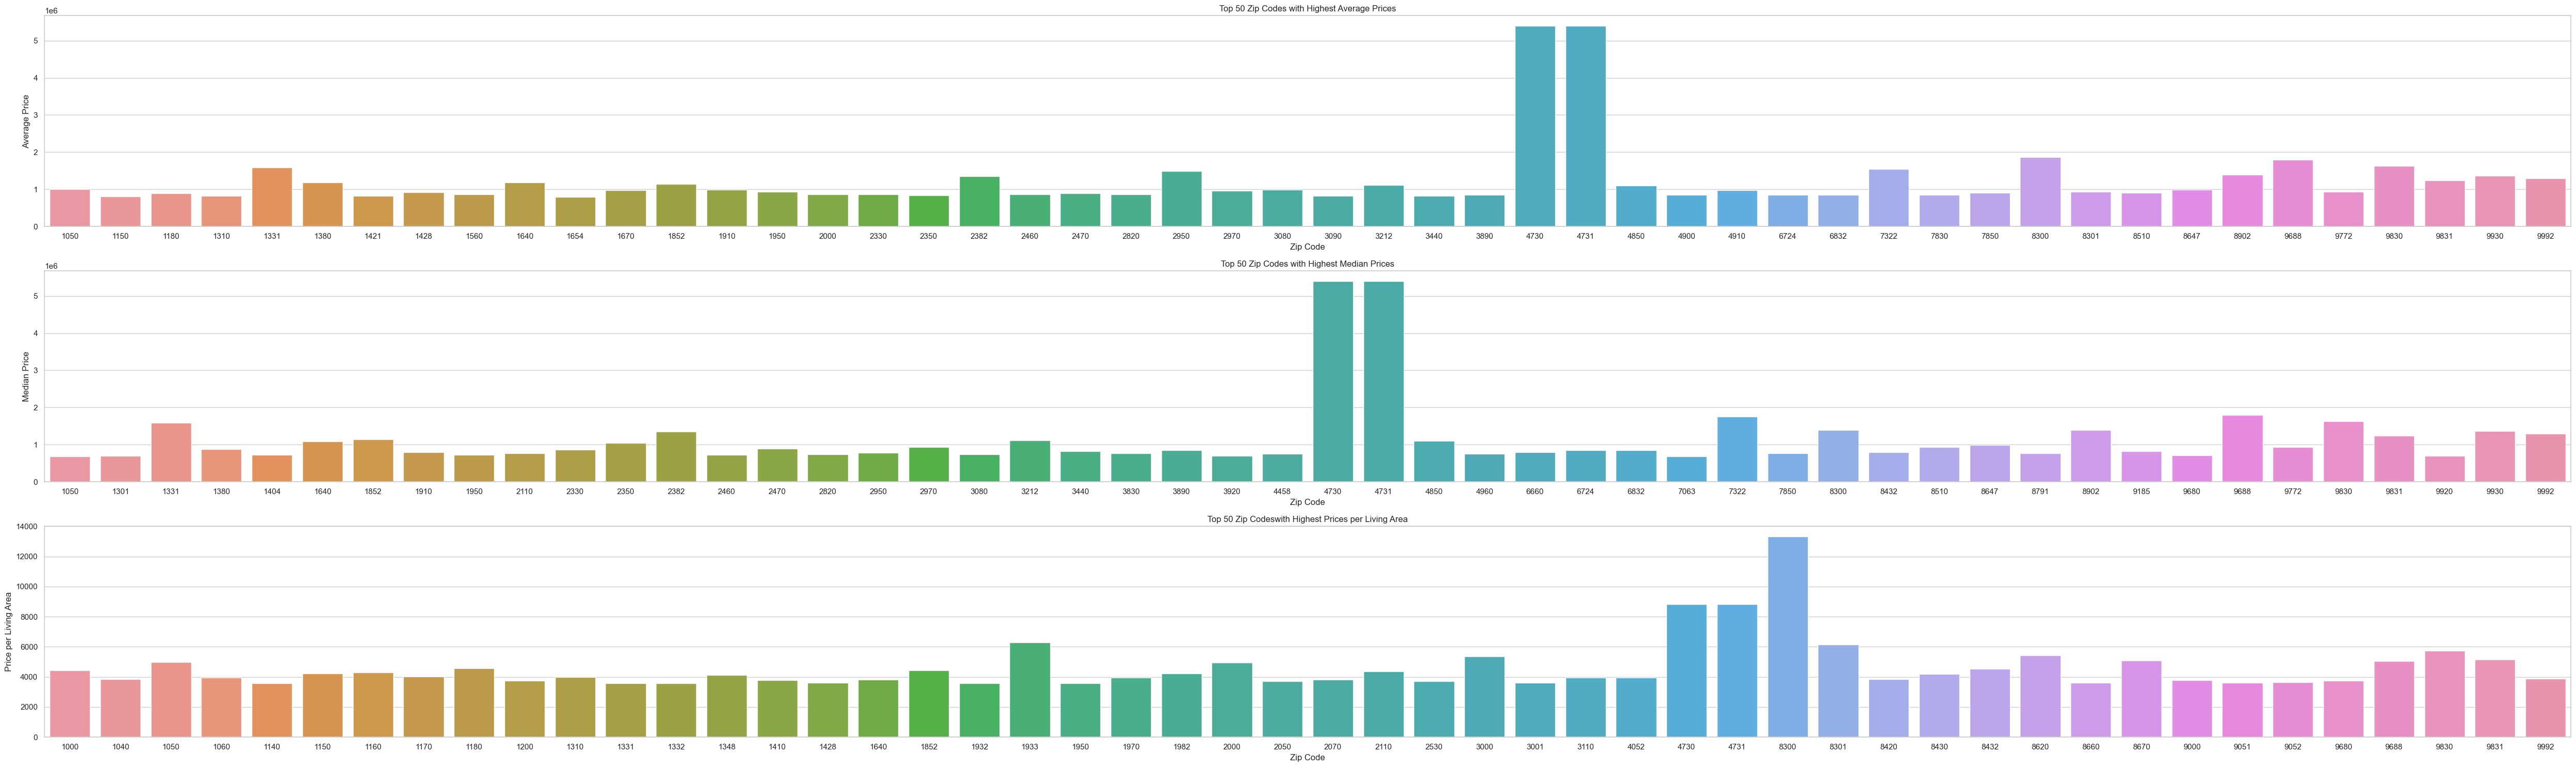

In [92]:
val = 50

# Calculate the top zip codes with highest average prices
top_avg_prices = df.groupby('Zip code')['Price of property in euro'].mean().nlargest(val)

# Calculate the top zip codes with highest median prices
top_median_prices = df.groupby('Zip code')['Price of property in euro'].median().nlargest(val)

# Calculate the top zip codes with highest prices per living area
df['Price per Living Area'] = df['Price of property in euro'] / df['Living area']
top_prices_per_area = df.groupby('Zip code')['Price per Living Area'].mean().nlargest(val)

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(val, 15))

# Plot the top zip codes with highest average prices
sns.barplot(x=top_avg_prices.index, y=top_avg_prices.values, ax=axes[0])
axes[0].set_title('Top ' + str(val) + ' Zip Codes with Highest Average Prices')
axes[0].set_xlabel('Zip Code')
axes[0].set_ylabel('Average Price')

# Plot the top x zip codes with highest median prices
sns.barplot(x=top_median_prices.index, y=top_median_prices.values, ax=axes[1])
axes[1].set_title('Top ' + str(val) + ' Zip Codes with Highest Median Prices')
axes[1].set_xlabel('Zip Code')
axes[1].set_ylabel('Median Price')

# Plot the top x zip codes with highest prices per living area
sns.barplot(x=top_prices_per_area.index, y=top_prices_per_area.values, ax=axes[2])
axes[2].set_title('Top ' + str(val) + ' Zip Codeswith Highest Prices per Living Area')
axes[2].set_xlabel('Zip Code')
axes[2].set_ylabel('Price per Living Area')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()
